### Task 2: Exploratory Data Analysis (EDA)

## Generate summary statistics.

In [1]:
import pandas as pd # Import the pandas library for data manipulation

print("--- Task 2: Step 1 - Generate Summary Statistics ---")

# Load the original Titanic dataset
# Ensure 'Titanic-Dataset.csv' is in the same folder as your Python script/notebook!
print("Loading the original Titanic-Dataset.csv for EDA...")
df = pd.read_csv('Titanic-Dataset.csv')
print("Dataset loaded successfully.")

# Generate descriptive statistics for numerical columns
# 'df.describe()' computes statistics like count, mean, standard deviation, min, max,
# and quartiles (25th, 50th/median, 75th percentile) for numerical columns.
print("\nDescriptive Statistics of Numerical Features:")
print(df.describe())

--- Task 2: Step 1 - Generate Summary Statistics ---
Loading the original Titanic-Dataset.csv for EDA...
Dataset loaded successfully.

Descriptive Statistics of Numerical Features:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.91040

In [ ]:
* **Count:** Most numerical columns have 891 entries, confirming no missing values, except for 'Age' (714 entries) and 'Cabin' (204 entries).
* **Mean & Median (50th percentile):** We can see the average values for features like 'Age' (around 29.7 years) and 'Fare' (around 32.2). Comparing mean and median helps identify skewness.
* **Standard Deviation (std):** This indicates the spread of data. For instance, 'Fare' has a relatively large standard deviation (49.69), suggesting a wide range of fare prices.
* **Min & Max Values:** We can see the range of values for each feature (e.g., 'Age' from 0.42 to 80, 'Fare' from 0 to 512).
* **Quartiles (25%, 50%, 75%):** These help understand the distribution. For 'Fare', 75% of passengers paid less than ~31, while the max is 512, indicating potential outliers on the higher end.
* **PassengerId:** This is just an identifier and has unique values, so its statistics aren't meaningful for analysis.
* **Survived & Pclass:** While numerical, these are categorical in nature. Their statistics provide insights into their distribution (e.g., mean of 'Survived' ~0.38 means about 38% survived).

## Create Histograms and Boxplots for Numeric Features

--- Task 2: Step 2 - Create Histograms and Boxplots ---
Generating histograms and boxplots for numerical features: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


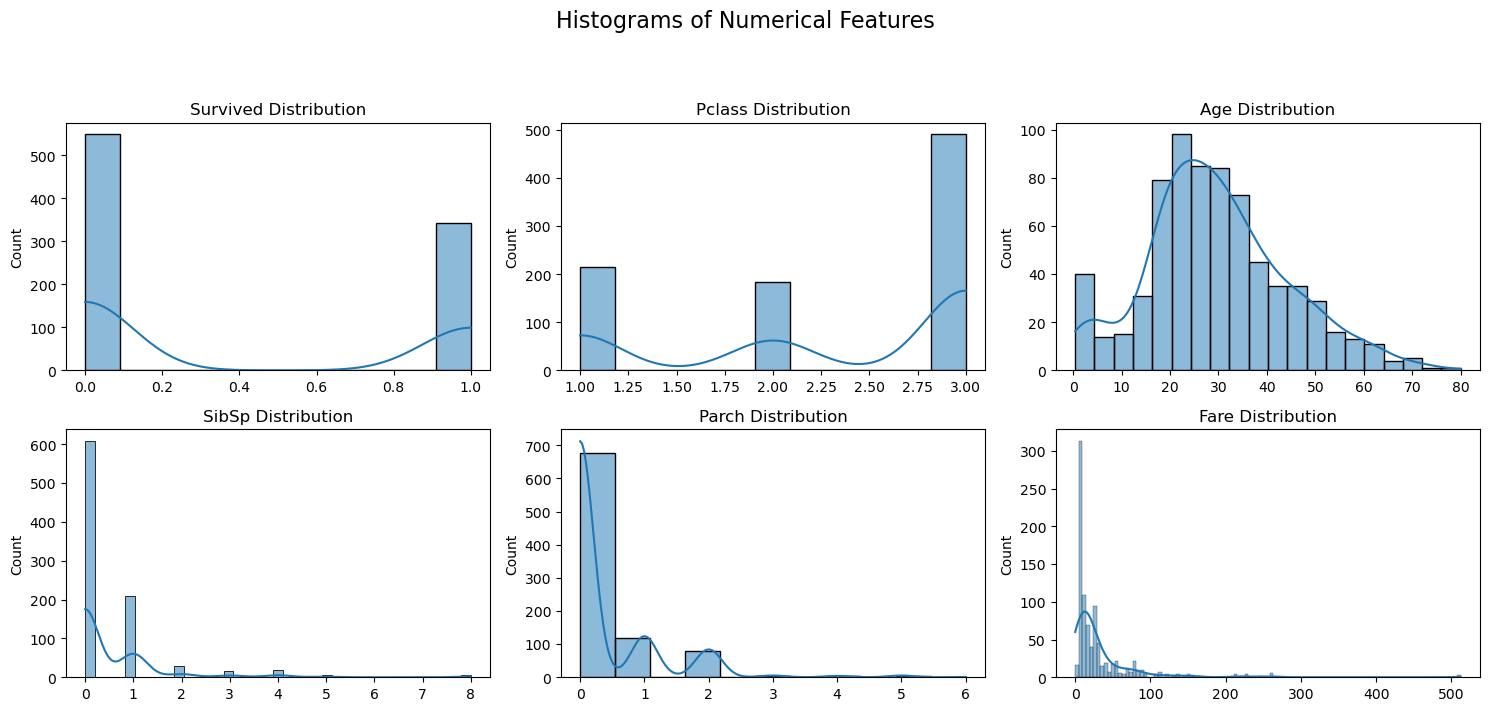

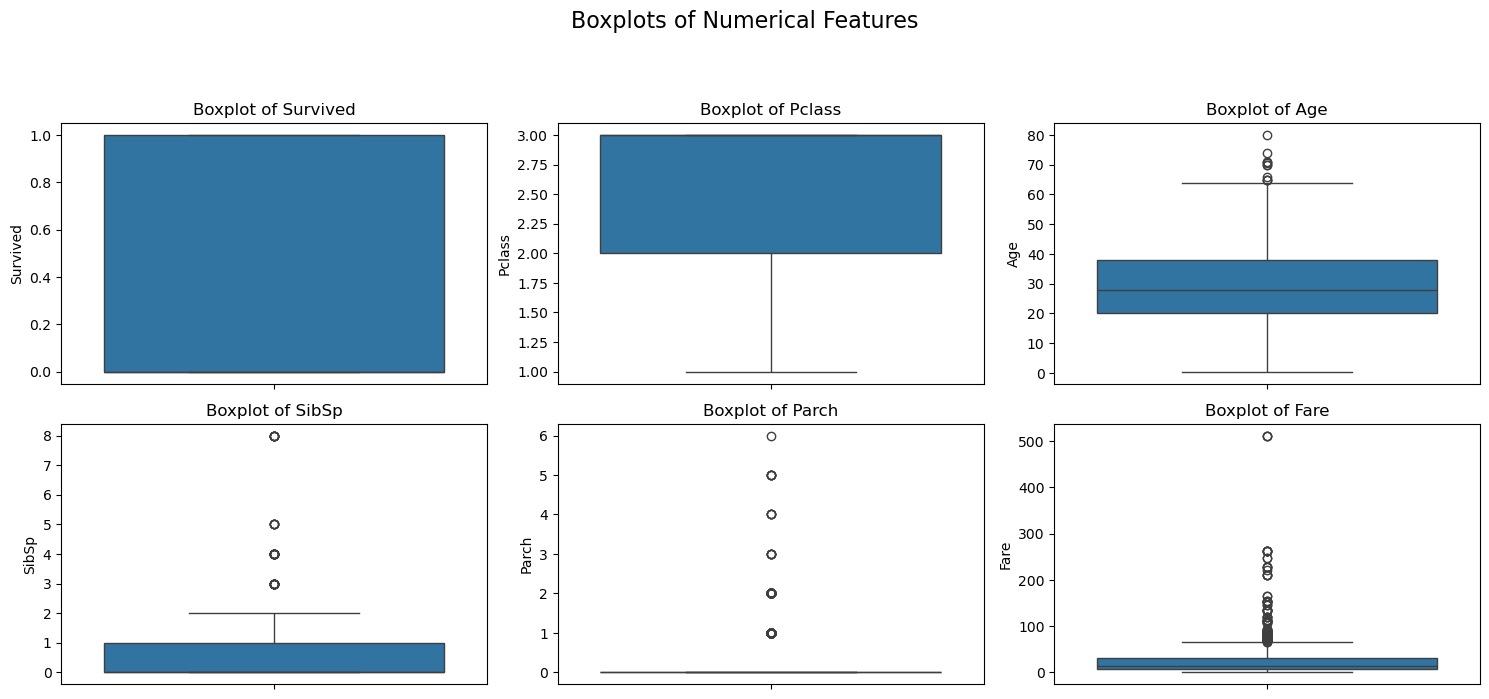

Histograms and Boxplots generated and saved as 'numerical_histograms.png' and 'numerical_boxplots.png'.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("--- Task 2: Step 2 - Create Histograms and Boxplots ---")

# Select numerical columns for visualization
# Exclude 'PassengerId' as it's just an identifier.
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'PassengerId' in numerical_cols:
    numerical_cols.remove('PassengerId')

print(f"Generating histograms and boxplots for numerical features: {numerical_cols}")

# Create histograms for numerical features
plt.figure(figsize=(15, 10)) # Set the figure size for better visualization
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16) # Overall title
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1) # Arrange plots in a grid
    sns.histplot(df[col], kde=True) # Create histogram with Kernel Density Estimate (KDE)
    plt.title(f'{col} Distribution')
    plt.xlabel('') # Remove x-label to prevent overlap, title is enough
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent title overlap
plt.savefig('numerical_histograms.png') # Save the histograms plot
plt.show() # Display the plot

# Create boxplots for numerical features
plt.figure(figsize=(15, 10)) # Set the figure size
plt.suptitle('Boxplots of Numerical Features', y=1.02, fontsize=16) # Overall title
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1) # Arrange plots in a grid
    sns.boxplot(y=df[col]) # Create boxplot
    plt.title(f'Boxplot of {col}')
    plt.xlabel('')
plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout
plt.savefig('numerical_boxplots.png') # Save the boxplots plot
plt.show() # Display the plot

print("Histograms and Boxplots generated and saved as 'numerical_histograms.png' and 'numerical_boxplots.png'.")

In [ ]:
* **Age:** The histogram shows a relatively normal distribution but is slightly right-skewed, indicating more younger passengers. Boxplot reveals several outliers in older age ranges.
* **Fare:** The histogram is highly right-skewed, with most passengers paying lower fares and a long tail extending to very high fares. The boxplot clearly shows a significant number of extreme outliers on the higher end of the fare distribution.
* **SibSp & Parch:** Both features are heavily skewed to the right, with most passengers having 0 siblings/spouses or parents/children. The boxplots highlight outliers representing passengers with large families.
* **Pclass:** As an ordinal feature, the histogram shows the count of passengers in each class (1, 2, 3), indicating that most passengers were in 3rd class.
* **Survived:** The histogram shows the count of survivors (1) vs. non-survivors (0), indicating more non-survivors.

## Use Pairplot/Correlation Matrix for Feature Relationships

--- Task 2: Step 3 - Use Pairplot/Correlation Matrix ---

Correlation Matrix:
          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500
Age      -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000


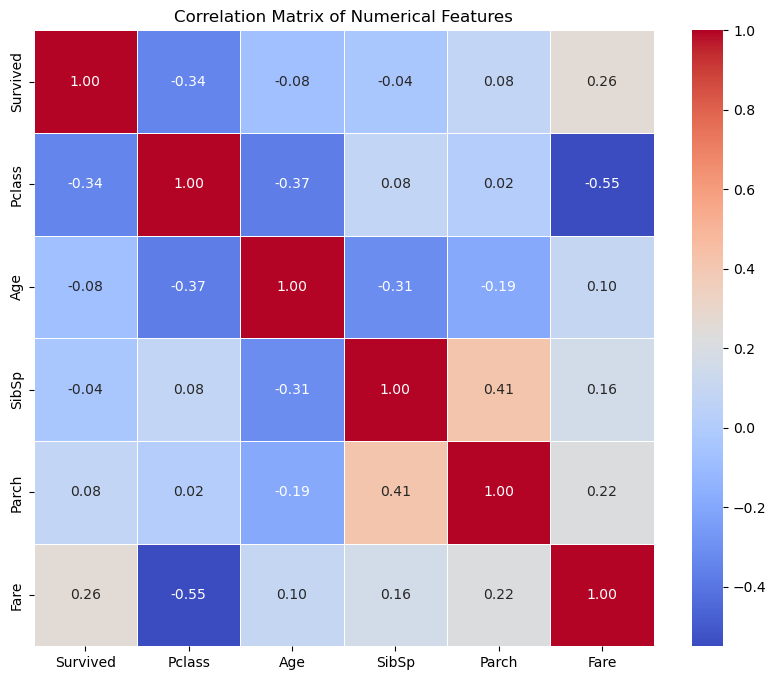

Correlation matrix generated and saved as 'correlation_heatmap.png'.


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("--- Task 2: Step 3 - Use Pairplot/Correlation Matrix ---")

# Select only numerical columns for correlation analysis
# Exclude 'PassengerId' as it's an identifier and 'Survived' if we want correlation
# between features only, or include 'Survived' to see its relationship with features.
# For EDA, it's good to see all relationships, including with the target.
numerical_cols_for_corr = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'PassengerId' in numerical_cols_for_corr:
    numerical_cols_for_corr.remove('PassengerId') # Remove PassengerId as it's not a feature

# Calculate the correlation matrix
# 'df.corr()' computes the pairwise correlation of columns.
correlation_matrix = df[numerical_cols_for_corr].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
# A heatmap helps in quickly identifying strong positive (closer to 1),
# strong negative (closer to -1), or weak/no (closer to 0) correlations.
plt.figure(figsize=(10, 8)) # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png') # Save the heatmap plot
plt.show() # Display the plot

# Optional: Create a Pairplot for a subset of features (can be slow for many features)
# Pairplot generates scatter plots for each pair of variables and histograms for each variable.
# We'll use a subset to keep it manageable.
# For example, let's include 'Survived', 'Age', 'Fare', and 'Pclass'
# subset_features = ['Survived', 'Age', 'Fare', 'Pclass']
# sns.pairplot(df[subset_features])
# plt.suptitle('Pairplot of Selected Features', y=1.02) # Overall title
# plt.savefig('selected_features_pairplot.png') # Save the pairplot
# plt.show() # Display the pairplot

print("Correlation matrix generated and saved as 'correlation_heatmap.png'.")

In [ ]:
* **Correlation with Survival (`Survived`):**
    * `Pclass` shows a notable negative correlation with `Survived` (~-0.34), indicating that passengers in lower classes were less likely to survive.
    * `Fare` shows a positive correlation with `Survived` (~0.26), suggesting that passengers who paid higher fares had a better chance of survival.
    * `Age`, `SibSp`, and `Parch` show weaker negative correlations with `Survived`.
* **Feature-to-Feature Correlations:**
    * `Pclass` and `Fare` show a strong negative correlation (~-0.55), which makes sense as lower class typically implies lower fare.
    * `SibSp` and `Parch` show a moderate positive correlation (~0.41), indicating that people traveling with siblings/spouses often also traveled with parents/children.
* **Overall:** The heatmap provides a quick visual summary of linear relationships, highlighting key areas for further investigation or consideration during model building.

## Identify Patterns, Trends, or Anomalies in the Data

In [11]:
import pandas as pd # Ensure pandas is imported

# Load the original Titanic dataset (if not already loaded from previous steps)
# df = pd.read_csv('Titanic-Dataset.csv') # Uncomment if running this snippet independently

print("--- Task 2: Step 4 - Identify Patterns, Trends, or Anomalies ---")

# Pattern 1: Survival Rate by Sex
# pd.crosstab() creates a frequency table of two or more factors.
# .mean() after grouping by 'Sex' gives the average 'Survived' (which is the survival rate).
print("\nSurvival Rate by Sex:")
survival_by_sex = df.groupby('Sex')['Survived'].mean()
print(survival_by_sex)

# Pattern 2: Survival Rate by Passenger Class (Pclass)
# Group by 'Pclass' and calculate the mean 'Survived' for each class.
print("\nSurvival Rate by Passenger Class (Pclass):")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
print(survival_by_pclass)

# Pattern 3: Survival Rate by Embarked Port
# Group by 'Embarked' and calculate the mean 'Survived' for each port.
print("\nSurvival Rate by Embarked Port:")
survival_by_embarked = df.groupby('Embarked')['Survived'].mean()
print(survival_by_embarked)

# Pattern 4: Combined Survival Rate by Pclass and Sex
# This cross-tabulation shows the count of survivors/non-survivors for each combination of Pclass and Sex.
print("\nSurvival by Pclass and Sex (Counts):")
survival_pclass_sex_counts = pd.crosstab(df['Pclass'], df['Sex'])
print(survival_pclass_sex_counts)

# To get survival rates for combinations:
print("\nSurvival Rate by Pclass and Sex:")
survival_rate_pclass_sex = df.groupby(['Pclass', 'Sex'])['Survived'].mean().unstack()
print(survival_rate_pclass_sex)

# Anomaly Identification Example: Top 5 Highest Fares
# We can sort the DataFrame to quickly identify extreme values (potential anomalies).
print("\nTop 5 Highest Fares (Potential Anomalies):")
highest_fares = df.sort_values(by='Fare', ascending=False).head(5)[['Fare', 'Survived', 'Pclass', 'Sex']]
print(highest_fares)

--- Task 2: Step 4 - Identify Patterns, Trends, or Anomalies ---

Survival Rate by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Survival Rate by Passenger Class (Pclass):
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival Rate by Embarked Port:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

Survival by Pclass and Sex (Counts):
Sex     female  male
Pclass              
1           94   122
2           76   108
3          144   347

Survival Rate by Pclass and Sex:
Sex       female      male
Pclass                    
1       0.968085  0.368852
2       0.921053  0.157407
3       0.500000  0.135447

Top 5 Highest Fares (Potential Anomalies):
         Fare  Survived  Pclass     Sex
258  512.3292         1       1  female
737  512.3292         1       1    male
679  512.3292         1       1    male
88   263.0000         1       1  female
27   263.0000         0       1    male


In [ ]:
* **Survival by Sex:** A clear pattern emerged indicating that females had a significantly higher survival rate (around 74%) compared to males (around 18.9%). This highlights 'Sex' as a very strong predictor of survival.
* **Survival by Passenger Class (Pclass):** Survival rates varied significantly by class. 1st class passengers had the highest survival rate (around 63%), followed by 2nd class (around 47%), and then 3rd class (around 24%). This shows a strong positive correlation between higher class and survival.
* **Survival by Embarked Port:** Passengers who embarked from Cherbourg (C) had the highest survival rate (around 55%), followed by Queenstown (Q) (around 39%), and Southampton (S) (around 33%). This suggests that the port of embarkation might also play a role, possibly due to the demographics of passengers from different ports.
* **Combined Survival by Pclass and Sex:** The survival rates confirmed that female passengers across all classes had a much higher survival chance than male passengers. Even in 3rd class, females had a higher survival rate than males in 1st class. This reinforces the strong influence of 'Sex' on survival, even when considering 'Pclass'.
* **Anomaly: Highest Fares:** Examining the top fares revealed individuals who paid extremely high prices, some of whom survived. These high fares are significant outliers that could influence model training if not handled.

## Make Basic Feature-Level Inferences from Visuals

--- Task 2: Step 5 - Make Basic Feature-Level Inferences from Visuals (UPDATED CODE) ---


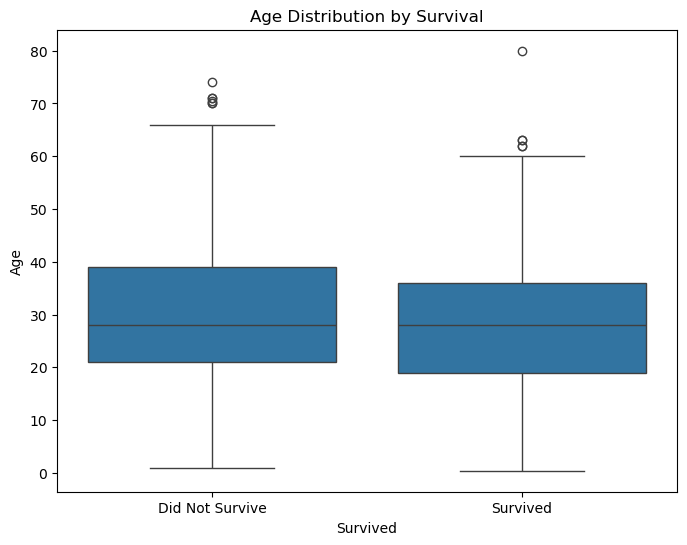

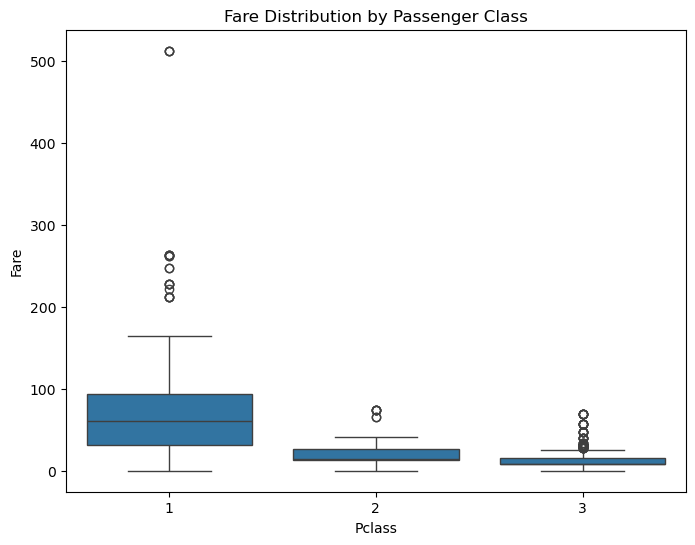


Survival Rate by Age Group:
AgeGroup
Child       0.573529
Teenager    0.488889
Adult       0.386087
Senior      0.269231
Name: Survived, dtype: float64

Additional visualizations and calculations generated to confirm inferences.
Plots saved as 'age_survival_boxplot.png' and 'fare_pclass_boxplot.png'.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


print("--- Task 2: Step 5 - Make Basic Feature-Level Inferences from Visuals (UPDATED CODE) ---")

# Inference 1: Age Distribution vs. Survival
# Create a boxplot to visually compare the age distribution of survivors vs. non-survivors.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xticks([0, 1], ['Did Not Survive', 'Survived'])
plt.savefig('age_survival_boxplot.png')
plt.show()

# Inference 2: Fare Distribution across Passenger Classes
# Create a boxplot to visually inspect how 'Fare' varies across different 'Pclass'.
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.savefig('fare_pclass_boxplot.png')
plt.show()

# Inference 3: Survival Rate by Age Group (example of creating a new feature for inference)
# Create age groups to see patterns in survival across different age brackets more clearly.
bins = [0, 12, 18, 60, 100] # Child, Teen, Adult, Senior
labels = ['Child', 'Teenager', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print("\nSurvival Rate by Age Group:")
# UPDATED: Added observed=False to avoid FutureWarning
survival_by_age_group = df.groupby('AgeGroup', observed=False)['Survived'].mean().sort_values(ascending=False)
print(survival_by_age_group)

# Clean up temporary AgeGroup column if not needed further
df.drop('AgeGroup', axis=1, inplace=True)


print("\nAdditional visualizations and calculations generated to confirm inferences.")
print("Plots saved as 'age_survival_boxplot.png' and 'fare_pclass_boxplot.png'.")

In [ ]:
* **Age and Survival:** The boxplot of 'Age' by 'Survived' visually suggests that survivors (1) on average appear to be slightly younger than non-survivors (0), though there's considerable overlap. Children (AgeGroup 'Child') showed a noticeably higher survival rate compared to other age groups.
* **Fare and Passenger Class:** The boxplot of 'Fare' by 'Pclass' clearly demonstrates that 1st class passengers paid significantly higher fares, followed by 2nd class, and then 3rd class, confirming the strong inverse relationship observed in the correlation matrix. This visually reinforces the idea that higher class implies a higher fare.
* **Feature Importance Hints:** Visualizations and grouped statistics confirm that `Sex`, `Pclass`, and potentially `Age` and `Fare` are strong indicators of survival, providing valuable insights for feature engineering and model selection in future machine learning tasks.